## Importations

In [1]:
## plots
import matplotlib.pyplot as plt
from matplotlib import rc

##
import seaborn as sns

import sys
sys.path.append('../')

## ML :
from scripts.machine_learning_utils import *
from scripts.models import *
from scripts.descriptors import *

rc('font', family='sans-serif', size = 7)
rc('figure', dpi= 700)
rc(('xtick', 'ytick'), labelsize = 7)
rc('legend', fontsize=6)
rc('lines', linewidth = 1)
rc('axes', linewidth = 0.5, labelsize =8)
rc('legend', handlelength = 2)

Skipped loading some PyTorch models, missing a dependency. No module named 'torch'
Skipped loading modules with pytorch-geometric dependency, missing a dependency. No module named 'torch'
Skipped loading modules with pytorch-lightning dependency, missing a dependency. No module named 'torch'
Skipped loading some Jax models, missing a dependency. No module named 'jax'


## Get data

In [2]:
df_total = pd.read_csv('../tables/data/df_total.csv').set_index('SMILES')

df_OCO = df_total[df_total.group == 'OCO']
df_ONO = df_total[df_total.group == 'ONO']
df_NNN = df_total[df_total.group == 'NNN']
df_triarylboranes = df_total[df_total.group == "triarylboranes"]

## Define classes for stratified sampling

In [3]:
def classify_FIA(FIA):
    if FIA < 250 :
        return('very weak LA')
    if 250 <= FIA < 300:
        return('weak LA')
    if 300<=FIA <400 :
        return('medium LA')
    if 400 <= FIA < 500 :
        return('good LA')
    if 500 <= FIA < 550: 
        return('strong LA')
    if 550 <= FIA:
        return('super LA')

In [4]:
df_ONO_class = df_ONO.reset_index()

classes = [classify_FIA(fia) for fia in df_ONO_class.FIA]

df_ONO_class['class FIA']= classes

In [5]:
df_ONO_class

,SMILES,FIA,group,HIA,reorg_nrj,GEI,class FIA
0,Brc1cc(Br)c2c(c1)N1B(O2)Oc2c(Br)cc(Br)cc21,416.679896,ONO,421.884054,185.550040,2.310061,good LA
1,Brc1ccc2c(c1)N1B(O2)Oc2ccc(Br)cc21,379.552855,ONO,NaN,NaN,1.898749,medium LA
2,Brc1ccc2c(c1)OB1Oc3cc(Br)ccc3N12,382.616262,ONO,NaN,NaN,1.853526,medium LA
3,Brc1ccc2c(c1Br)OB1Oc3c(ccc(Br)c3Br)N12,410.148439,ONO,NaN,NaN,2.164767,good LA
4,Brc1cccc2c1OB1Oc3c(Br)cccc3N12,378.320209,ONO,NaN,NaN,1.840464,medium LA
...,...,...,...,...,...,...,...
267,Oc1cc2c(cc1Cl)OB1Oc3cc(Cl)c(O)cc3N12,358.922619,ONO,364.687746,196.307540,1.829186,medium LA
268,Oc1ccc2c(c1)N1B(O2)Oc2ccc(O)cc21,331.103499,ONO,NaN,NaN,1.436671,medium LA
269,Oc1ccc2c(c1)OB1Oc3cc(O)ccc3N12,340.497602,ONO,NaN,NaN,1.136671,medium LA
270,Oc1cccc2c1OB1Oc3c(O)cccc3N12,370.984787,ONO,NaN,NaN,1.340835,medium LA


In [6]:
from sklearn.model_selection import StratifiedShuffleSplit

stratified_split = StratifiedShuffleSplit(n_splits=1, test_size = 0.2, random_state = 26)

for train_index, test_index in stratified_split.split(df_ONO_class, df_ONO_class['class FIA']):
    df_ONO_train = df_ONO_class.loc[train_index]
    df_ONO_test = df_ONO_class.loc[test_index]

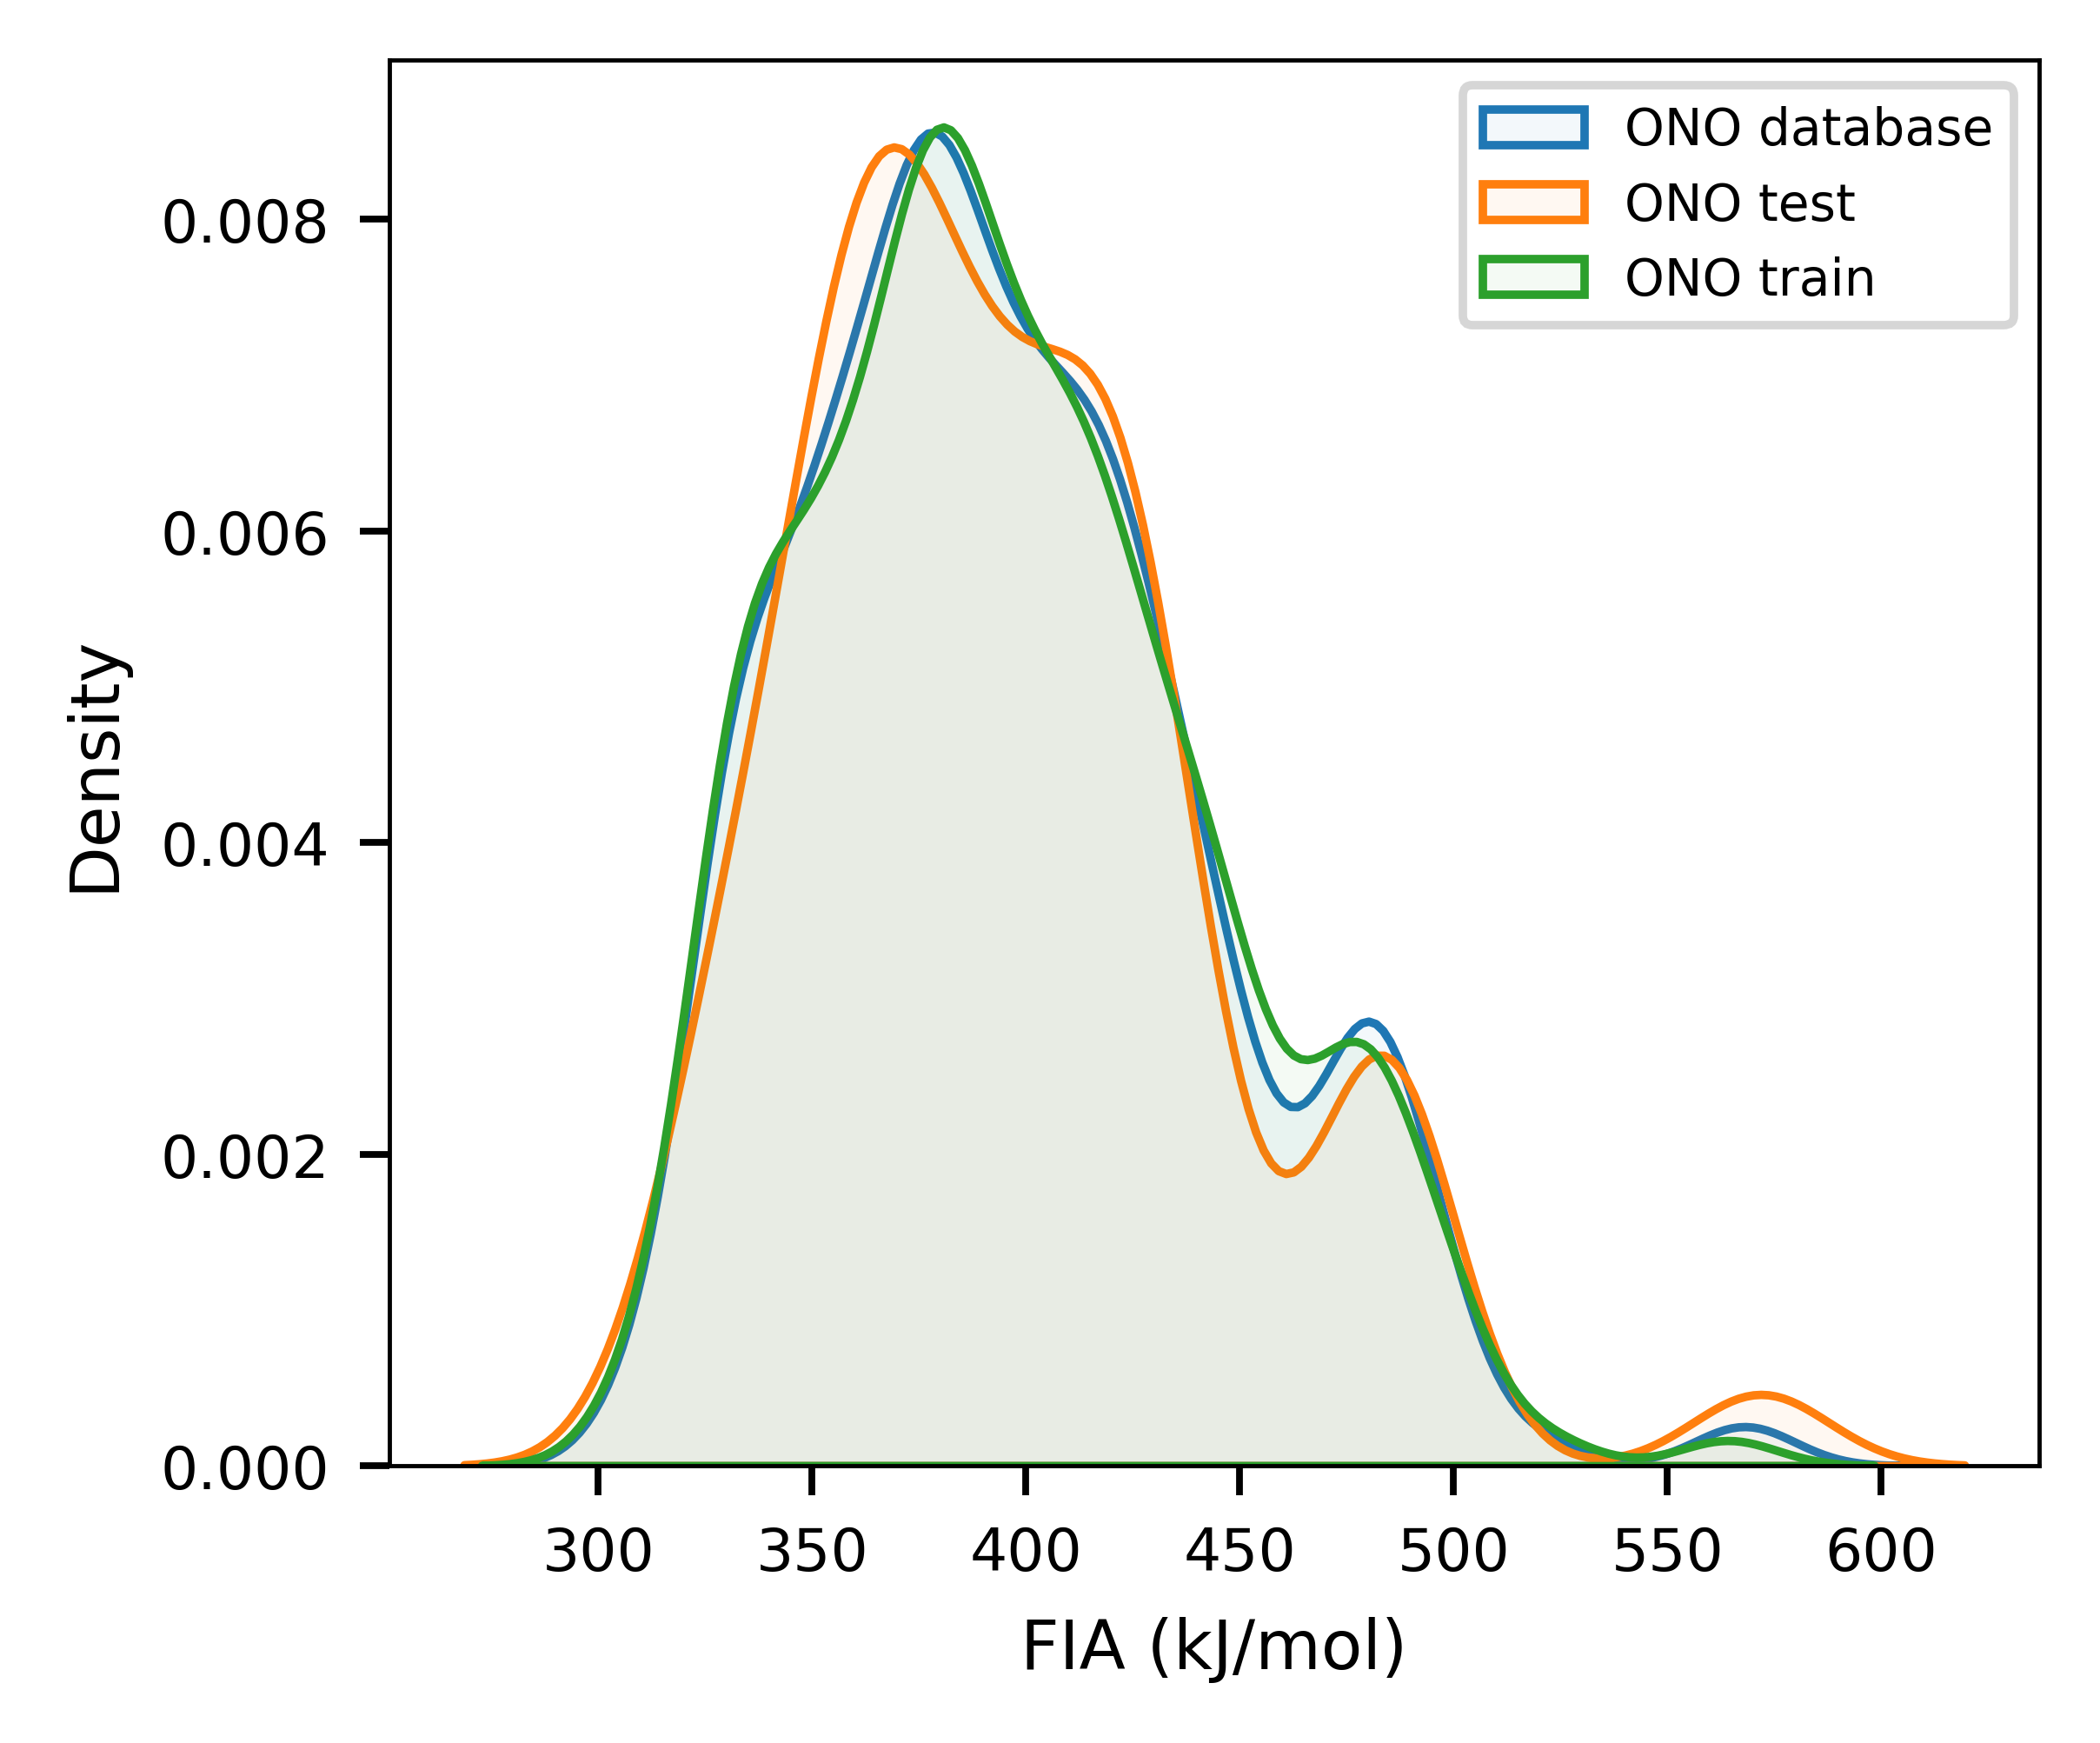

In [9]:
#sns.displot(df_total, x="FIA", kind ='kde', bw_adjust = 0.7, hue = 'group')
fig = plt.figure(figsize=(3.5, 3))

ax = fig.add_subplot()


bandwidth = 0.7
sns.kdeplot(df_ONO, x="FIA", bw_adjust = bandwidth, label = 'ONO database', fill =True, alpha=0.05, ax = ax)
sns.kdeplot(df_ONO_test, x="FIA", bw_adjust = bandwidth, label = 'ONO test', fill =True, alpha=0.05, ax = ax)
sns.kdeplot(df_ONO_train, x="FIA", bw_adjust = bandwidth, label = 'ONO train', fill =True, alpha=0.05, ax = ax)

ax.set_xlabel('FIA (kJ/mol)')
ax.legend()


fig.savefig('../results/benchmark_ML_models_descriptors/train_test_split_ONO.png', format='png', transparent= True, bbox_inches='tight')

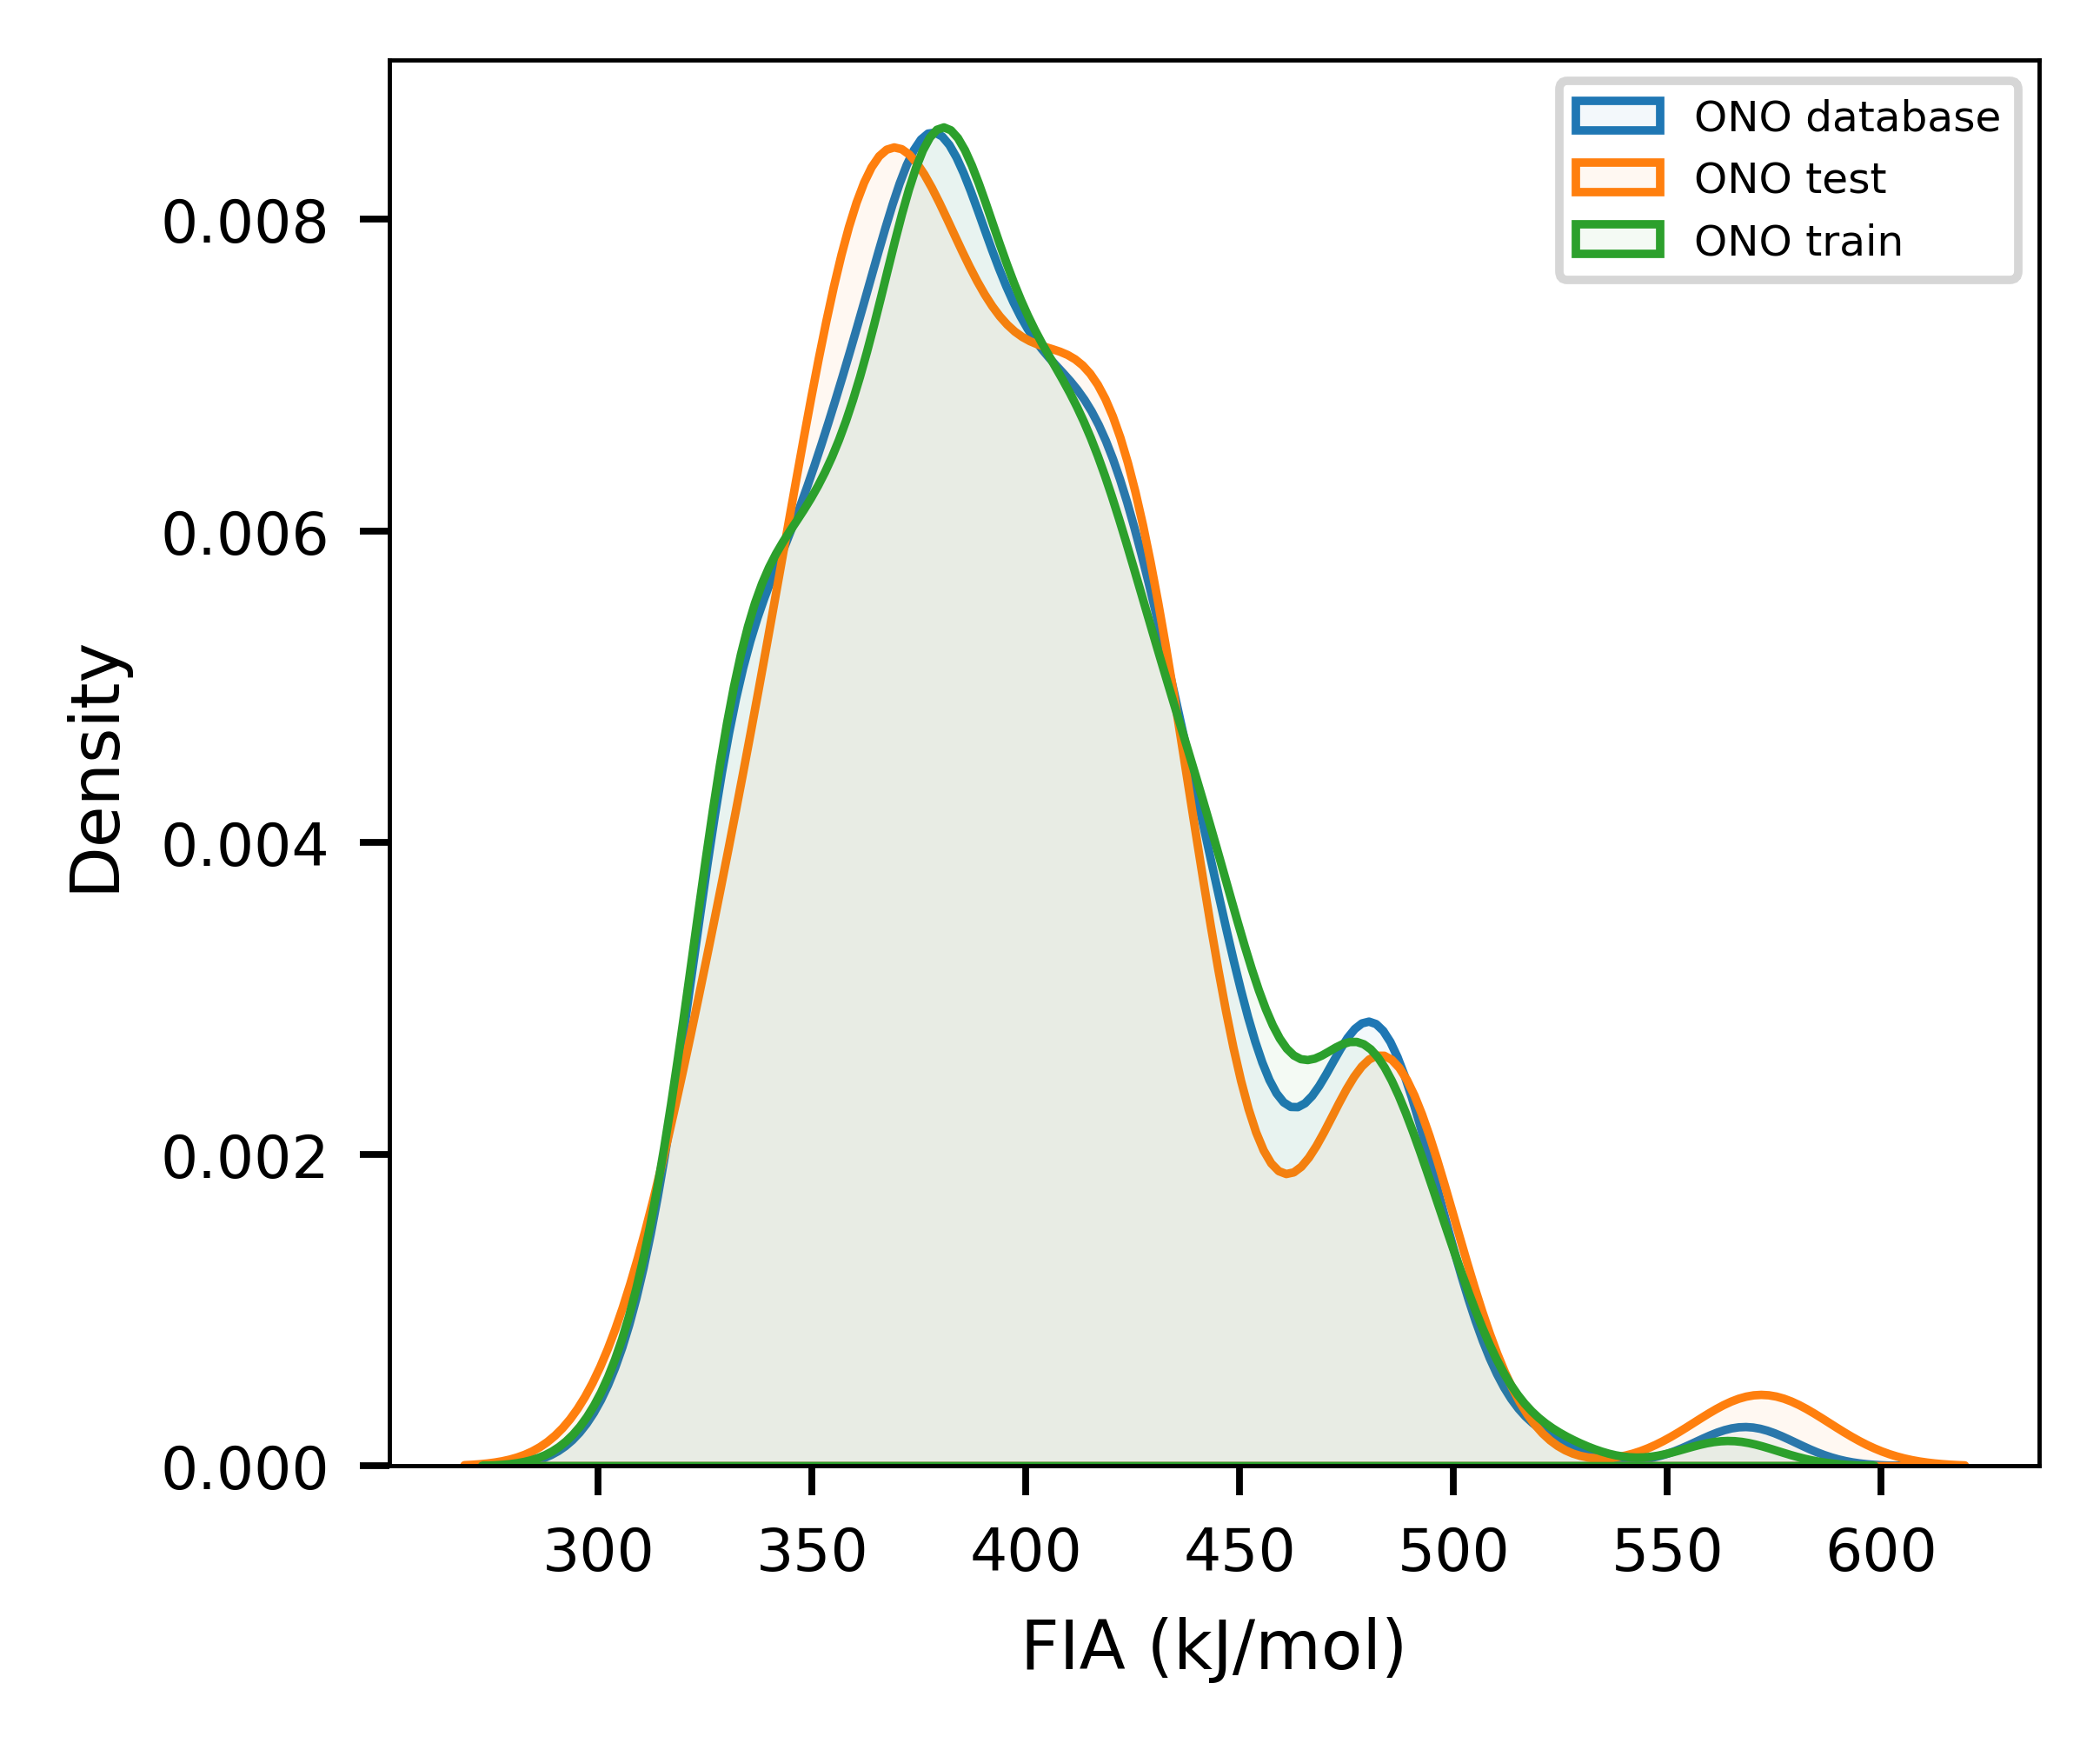

In [7]:
#sns.displot(df_total, x="FIA", kind ='kde', bw_adjust = 0.7, hue = 'group')
fig = plt.figure(figsize=(3.5, 3))

ax = fig.add_subplot()


bandwidth = 0.7
sns.kdeplot(df_ONO, x="FIA", bw_adjust = bandwidth, label = 'ONO database', fill =True, alpha=0.05, ax = ax)
sns.kdeplot(df_ONO_test, x="FIA", bw_adjust = bandwidth, label = 'ONO test', fill =True, alpha=0.05, ax = ax)
sns.kdeplot(df_ONO_train, x="FIA", bw_adjust = bandwidth, label = 'ONO train', fill =True, alpha=0.05, ax = ax)

ax.set_xlabel('FIA (kJ/mol)')
ax.legend()


fig.savefig('article/figures/train_test_split_ONO.png', format='png', transparent= True, bbox_inches='tight')

5 ou 10 ou 11 ou 21 ou 23 ou 26
CCL : 11 est mieux

In [10]:
df_ONO_train.set_index("SMILES").to_csv("../tables/data/ONO_train_set.csv")

In [11]:
df_ONO_test.set_index("SMILES").to_csv("../tables/data/ONO_test_set.csv")